<a href="https://colab.research.google.com/github/Fercaspe/Proyecto_Final_DataUy/blob/main/FC_Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto Final**

##**Objetivo**

Con este proyecto se busca predecir si el ingreso de una persona será mayor a USD 50.000 anuales, basados en el conjunto de datos "Adult (Census Income)".

##**Contexto**

Origen de la información: https://archive.ics.uci.edu/dataset/2/adult

El dataset "Adult (Census Income)" fué extraído por Barry Becker del censo de Estados Unidos de 1994 y contiene información demográfica, educativa y laboral de personas adultas.

La base de datos incluye las variables "sexo" y "raza", las cuales podrían introducir sesgos éticos o discriminación en los modelos desarrollados a partir de estos datos.


##**Metodología**

En el desarrollo del proyecto se optó por comparar dos modelos representativos de distintos niveles de complejidad:

**Regresión Logística** fue seleccionado como modelo de referencia, dado que constituye una técnica clásica, robusta y estadísticamente sólida, frecuentemente utilizada como punto de partida en problemas de clasificación binaria.

**XGBoost** por otra parte es un algoritmo basado en árboles de decisión y representa una evolución moderna en el campo del aprendizaje automático.


##**Paso a paso.**

1.   **Análisis de las variables**: Análisis exploratorio del Dataset, estudio del balance de la variable objetivo, distribución y correlación de las variables numéricas, distribución y detección de clases subrepresentadas de variables categóricas, evaluación ética.
2.  **Preparación de los datos**: Desición sobre el manejo de las columnas "sexo" y "raza", variables con información redundante, modificación de las etiquetas en la columna objetivo.
3.  **Procesamiento**: Se realizará a través de un Pipeline que contendrá: Imputación de valores faltantes, normalización de las variables numéricas, One Hot Encoding para las variables categóricas.
4.  **Entrenamiento**: Se preparará un Pipeline con el método SMOTE para equilibrar el Dataset y se utilizará RandomizeSearchCV para optimizar los hiperparámetros del método XGBoost.
5.  **Evaluación**: Los modelos se evaluarán usando el Dataset de testeo con datos no vistos en el entrenamiento. Las métricas serán accuracy, precision, recall, f1-score y matriz de confusión.


##**Variables del Dataset original**



*   **Age**: Edad de la persona, en años. Valor numérico relacionado con experiencia laboral o etapa de vida.
*   **Workclass**: Tipo de empleador o sector laboral. Ej: ‘Private’, ‘Self-emp-not-inc’, ‘Federal-gov’.
*   **Fnlwgt**: Peso muestral del censo. Indica cuántas personas están representadas por la fila.
*   **Education**:	Nivel educativo alcanzado en texto. Ej: ‘Bachelors’, ‘HS-grad’, ‘Masters’.
*   **education-num**:	Nivel educativo codificado numéricamente (años de educación formal).
*   **marital-status**:	Estado civil. Ej: ‘Married-civ-spouse’, ‘Divorced’, ‘Never-married’.
*   **Occupation**:	Ocupación o tipo de trabajo. Ej: ‘Tech-support’, ‘Exec-managerial’.
*   **Relationship**:	Relación con el jefe/a de hogar. Ej: ‘Husband’, ‘Wife’, ‘Own-child’.
*   **race**:	Grupo étnico. Ej: ‘White’, ‘Black’, ‘Asian-Pac-Islander’.
*   **Sex**:	Género del individuo: ‘Male’ o ‘Female’.
*   **capital-gain**:	Ganancias por inversiones durante el último año.
*   **capital-loss**:	Pérdidas de capital durante el último año.
*   **hours-per-week**:	Cantidad de horas trabajadas por semana.
*   **native-country**:	País de origen. Mayoría de registros de EE.UU.
*   **Income**:	Variable objetivo: indica si el ingreso anual es >50K o <=50K.


###**Librerías**

In [ ]:
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
import math
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold, train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier, plot_importance, plot_tree
from scipy.stats import randint, uniform
from sklearn.pipeline import Pipeline as SklearnPipeline




###**Carga de datos**

In [ ]:
url = ("https://raw.githubusercontent.com/Fercaspe/Proyecto_Final_DataUy/refs/heads/main/adult.data")

df = pd.read_csv(url, na_values='?', header=None, skipinitialspace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


###**Agregar nombres de las columnas**

In [ ]:
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

df.columns = column_names
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


###**Análisis exploratorio**

* **Verificar que cada columna tenga el tipo de dato correcto, de acuerdo a su contenido.**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


*Todas las columnas tienen el tipo de datos correcto.*

* **Búsqueda de datos faltantes y cáculo del porcentaje que representan en cada variable.**

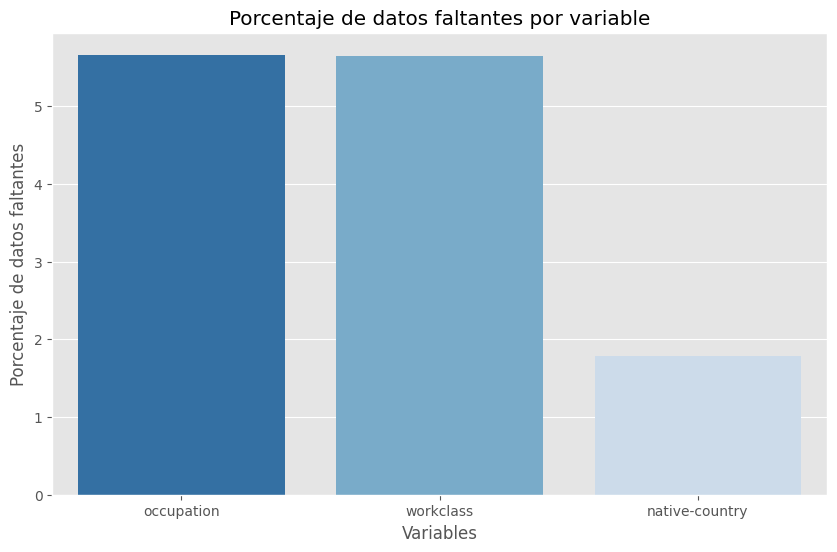

occupation        5.660146
workclass         5.638647
native-country    1.790486
dtype: float64


In [ ]:

faltantes = df.isnull().mean() * 100
faltantes = faltantes[faltantes > 0]. sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=faltantes.index, y=faltantes, palette="Blues_r")
plt.xlabel('Variables')
plt.ylabel('Porcentaje de datos faltantes')
plt.title('Porcentaje de datos faltantes por variable')
plt.show()

print(faltantes)


*Vemos que en tres columnas hay datos faltantes. En dos de ellas los faltantes representan menos del 6% para cada una y en la última, menos del 2%. Esto hace que sea posible utilizar mecanismos de imputación para completar estas variables.*

* **Balance de la variable objetivo.**

Al tratarse de un caso de clasificación, es recomendable que la variable objetivo contenga un número similar de cada uno de los valores a predecir.

Text(0.5, 0, 'ingreso')

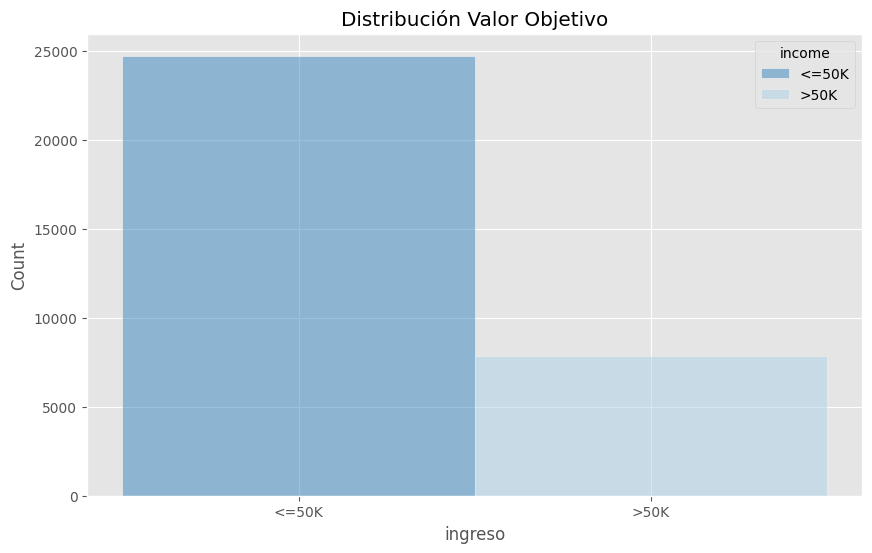

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.histplot(data=df, x="income", hue="income", palette="Blues_r", ax=ax)
ax.set_title("Distribución Valor Objetivo")
ax.set_xlabel("ingreso")

In [ ]:
conteo_valores = df["income"].value_counts()
print(conteo_valores)

income
<=50K    24720
>50K      7841
Name: count, dtype: int64


*Vemos que la columna con la variable objetivo presenta dos problemas:*
1.  *Los valores están representados por "<=50K" y "50K", por lo que se convertirán a "0" y "1".*
2.  *Hay una diferencia apreciable en la representación de cada uno de estos valores. Si bien el modelo XGBOOST puede manejar datos desbalanceados, usaremos el método SMOTE para corregir el problema.*


* **Distribución de las variables numéricas.**


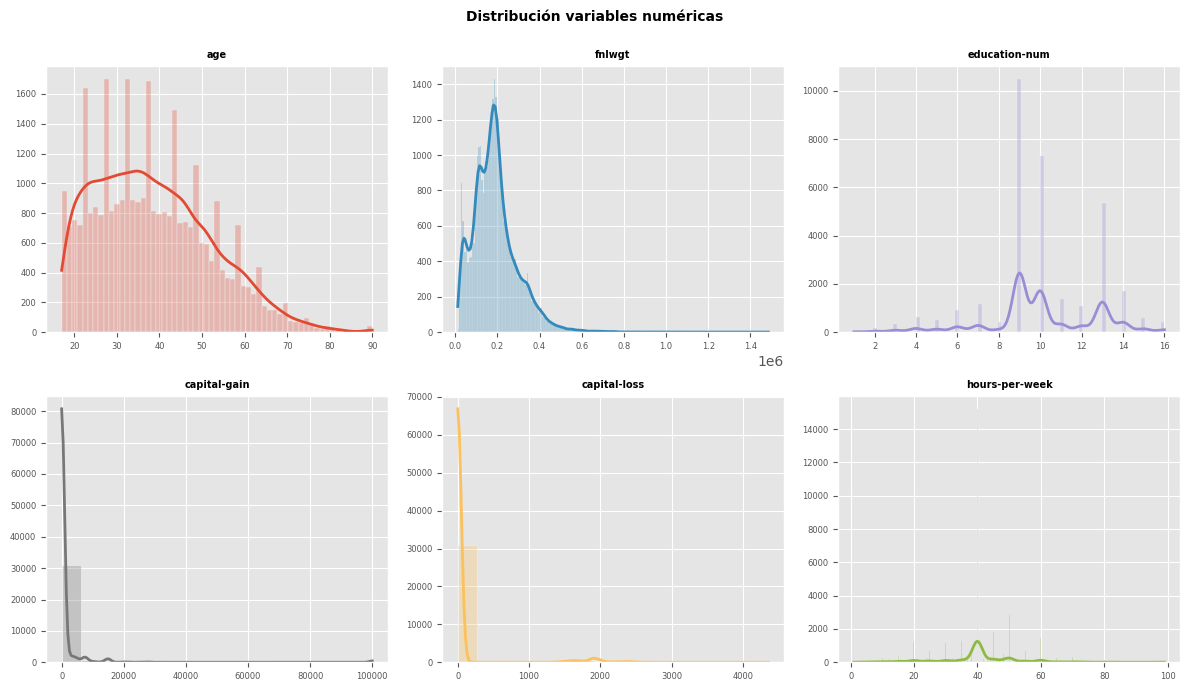

In [ ]:
# Obtenemos los nombres de las columnas numéricas
columnas_numeric = df.select_dtypes(include=['int64']).columns

# Gráfico de distribución para cada variable numérica

n_cols = 3
n_plots = len(columnas_numeric)
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 7))
axes = axes.flat

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");


* **Correlación.**

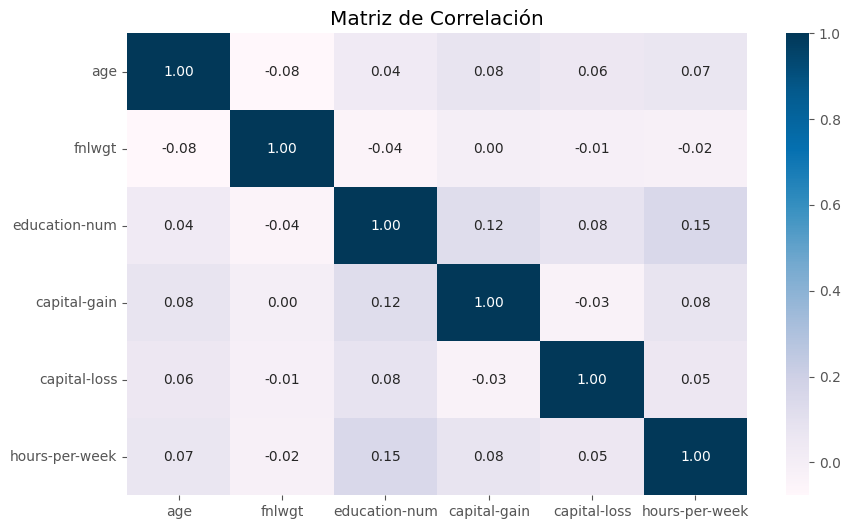

In [ ]:
df_numeric = df.select_dtypes(include=['int64'])

correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='PuBu', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

*Vemos que no existe correlación fuerte entre dos variables numéricas en el Dataset.*

*  **Distribución de las variables categóricas.**

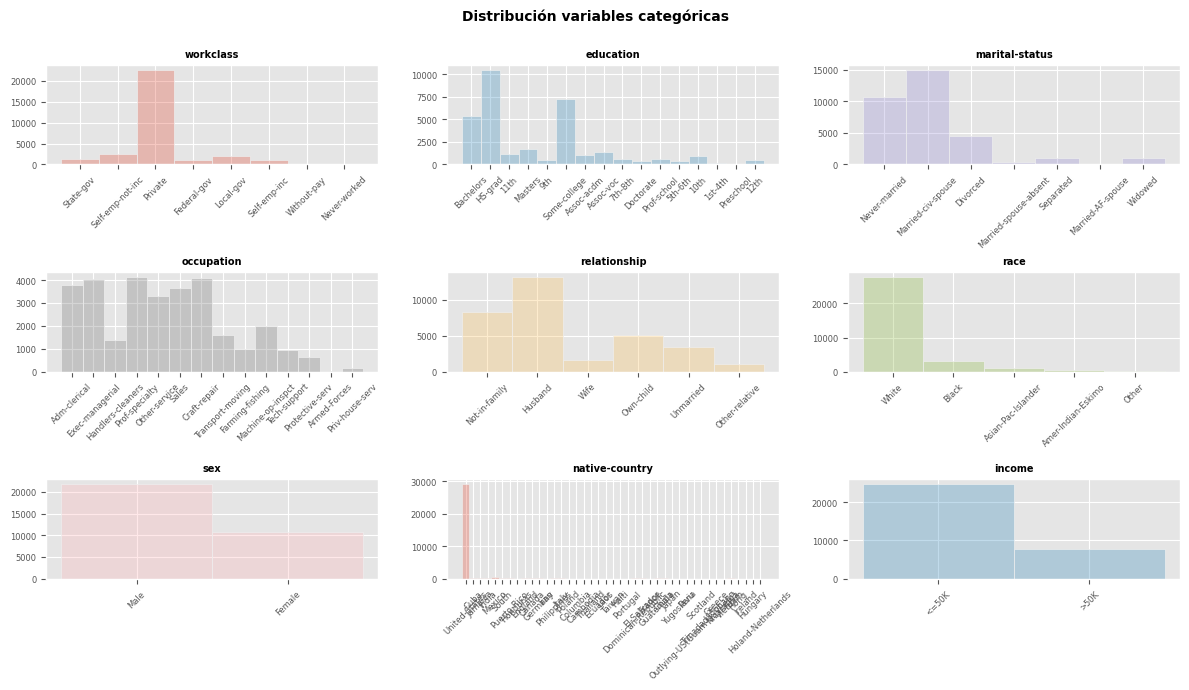

In [ ]:
# Obtenemos los nombres de las columnas categóricas
columnas_categ = df.select_dtypes(include=['object']).columns


# Gráfico de distribución para cada variable categórica

n_cols = 3
n_plots = len(columnas_categ)
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 7))
axes = axes.flat

for i, colum in enumerate(columnas_categ):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = False,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables categóricas', fontsize = 10, fontweight = "bold");

###**Preparación de datos**



1.   Retirar del Dataset las columnas de raza y sexo, para no generar una falta ética.
2.  En el Dataset se encuentran dos columnas de distinto tipo, pero que contienen información redundante. Se retira la columna "education" porque al ser categórica requiere un tratamiento especial y genera un aumento en la cantidad de variables. Mantenemos la columna "education-num" que representa la misma información.
3.  Modificar los datos de la columna que contiene las clases a predecir.
4.  Dividir el Dataset en datos de entrenamiento y datos de testeo.  



In [ ]:
# Eliminar columnas de Dataset

df.drop(["race", "sex", "education"], axis=1, inplace=True)
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,0,0,40,Cuba,<=50K


In [ ]:
# Dividir en Dataset en train y test, y cambiar etiquetas de la columna objetivo

X = df.drop("income", axis = 1)
y = df["income"].map({'<=50K': 0, '>50K': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42, shuffle = True)



###**Pipeline de Procesamiento**


*   Se imputan los valores faltantes en variables categóricas utilizando el valor más frecuente (MODA).
*   Se usa One Hot Encoding sobre las columnas categóricas.
*   Normalización de las variables numéricas.


In [ ]:
# Columnas categóricas y numéricas

categ_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(include=['int64']).columns

# Se crea el pipeline específico para las columnas categóricas

categ_pipeline = SklearnPipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")), ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))])

# Se crea el pipeline específico para las columnas numéricas

numeric_pipeline = SklearnPipeline(steps=[("scaler", StandardScaler())])

preprocessor = ColumnTransformer([("cat", categ_pipeline, categ_columns), ("num", numeric_pipeline, numeric_columns)])



###**Pipeline de Entrenamiento**



1.   **Regresión Logistica**

*   Se utiliza SMOTE para equilibrar el Dataset.
*   Se entrena y evalúa el modelo de Regresión Logística.

In [ ]:
# Pipeline con SMOTE y Regresión Logística

reglog_pipeline = Pipeline([("preprocessing", preprocessor), ("smote", SMOTE(random_state=42)), ("classifier", LogisticRegression())])

# Entrenar el modelo de Regresión Logística

reglog_pipeline.fit(X_train, y_train)

# Obtener predicciones en el conjunto de prueba

reglog_y_pred = reglog_pipeline.predict(X_test)

# Calcular métricas de evaluación

reglog_accuracy = accuracy_score(y_test, reglog_y_pred)
reglog_precision = precision_score(y_test, reglog_y_pred)
reglog_recall = recall_score(y_test, reglog_y_pred)
reglog_f1 = f1_score(y_test, reglog_y_pred)
reglog_conf_matrix = confusion_matrix(y_test, reglog_y_pred)

# Imprimir los resultados

print("Regresión Logística Accuracy:", reglog_accuracy)
print("Regresión Logística Precision:", reglog_precision)
print("Regresión Logística Recall:", reglog_recall)
print("Regresión Logística F1 Score:", reglog_f1)
print("Regresión Logística Confusion Matrix:\n", reglog_conf_matrix)



Regresión Logística Accuracy: 0.8040841394134808
Regresión Logística Precision: 0.5625795502757743
Regresión Logística Recall: 0.8440483768300445
Regresión Logística F1 Score: 0.675152749490835
Regresión Logística Confusion Matrix:
 [[3911 1031]
 [ 245 1326]]


2.   **XGBoost**

*   Se utiliza SMOTE para equilibrar el Dataset.
*   Se optimizan los hiperparámetros usando RandomizeSearchCV
*   Se entrena y evalúa el modelo de XBoost.

In [ ]:
# Pipeline con SMOTE y XGBoost

xgb_pipeline = Pipeline([("preprocessing", preprocessor), ("smote", SMOTE(random_state=42)), ("classifier", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))])


# Definir parámetros de optimización

xgb_parametros = {
    "classifier__n_estimators": randint(100, 300),
    "classifier__max_depth": randint(3, 10),
    "classifier__learning_rate": uniform(0.01, 0.3),
    "classifier__subsample": uniform(0.6, 0.4),
    "classifier__colsample_bytree": uniform(0.6, 0.4),
    "classifier__gamma": uniform(0, 5)
}

# RandomizedSearchCV

xgb_random_search = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=xgb_parametros,
    n_iter=30,
    scoring='f1_macro',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Entrenar el modelo de XGBoost

xgb_random_search.fit(X_train, y_train)

# Obtener predicciones en el conjunto de prueba

xgb_y_pred = xgb_random_search.predict(X_test)

# Calcular métricas de evaluación

xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)
xgb_conf_matrix = confusion_matrix(y_test, xgb_y_pred)

# Imprimir los resultados

print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Precision:", xgb_precision)
print("XGBoost Recall:", xgb_recall)
print("XGBoost F1 Score:", xgb_f1)
print("XGBoost Confusion Matrix:\n", xgb_conf_matrix)




Fitting 3 folds for each of 30 candidates, totalling 90 fits
XGBoost Accuracy: 0.8615077537233226
XGBoost Precision: 0.6853185595567867
XGBoost Recall: 0.7873965626989179
XGBoost F1 Score: 0.7328199052132701
XGBoost Confusion Matrix:
 [[4374  568]
 [ 334 1237]]


###**Comportamiento de los modelos prediciendo datos nunca vistos**

**Carga del nuevo dataset**

In [ ]:
url = ("https://raw.githubusercontent.com/Fercaspe/Proyecto_Final_DataUy/refs/heads/main/adult.test")

nuevo_df = pd.read_csv(url, na_values='?', skiprows=1, header=None, skipinitialspace=True)
nuevo_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


**Nombrar las columnas**

In [ ]:
nuevo_df.columns = column_names
nuevo_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


**Verificar que cada columna tenga el tipo de dato correcto, de acuerdo a su contenido.**

In [ ]:
nuevo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       15318 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      15315 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16007 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


###**Preparación de datos**

Preparamos el nuevo Dataset de la misma manera que lo hicimos con el anterior:

1.   Retirar del Dataset las columnas de raza y sexo, para no generar una falta ética.
2.  En el Dataset se encuentran dos columnas de distinto tipo, pero que contienen información redundante. Se retira la columna "education" porque al ser categórica requiere un tratamiento especial y genera un aumento en la cantidad de variables. Mantenemos la columna "education-num" que representa la misma información.
3.  Modificar los datos de la columna que contiene las clases a predecir.

En este caso sólo se divide el Dataset en datos datos (X) y objetivo (y).

In [ ]:
# Eliminar columnas de Dataset

nuevo_df.drop(["race", "sex", "education"], axis=1, inplace=True)
nuevo_df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,0,0,40,United-States,<=50K.
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,0,0,40,United-States,>50K.
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,7688,0,40,United-States,>50K.
4,18,NaN,103497,10,Never-married,NaN,Own-child,0,0,30,United-States,<=50K.


**Verificar nombre etiquetas de la columna objetivo**

In [ ]:
nuevo_conteo_valores = nuevo_df["income"].value_counts()
print(nuevo_conteo_valores)

income
<=50K.    12435
>50K.      3846
Name: count, dtype: int64


In [ ]:
# Dividir el Dataset y cambiar etiquetas de la columna objetivo

nuevo_X = nuevo_df.drop("income", axis = 1)
nuevo_y = nuevo_df["income"].map({'<=50K.': 0, '>50K.': 1})

**Predicción usando Regresión Logísitica**

In [ ]:
# Obtener predicciones

nuevo_reglog_y_pred = reglog_pipeline.predict(nuevo_X)

# Calcular métricas de evaluación

nuevo_reglog_accuracy = accuracy_score(nuevo_y, nuevo_reglog_y_pred)
nuevo_reglog_precision = precision_score(nuevo_y, nuevo_reglog_y_pred)
nuevo_reglog_recall = recall_score(nuevo_y, nuevo_reglog_y_pred)
nuevo_reglog_f1 = f1_score(nuevo_y, nuevo_reglog_y_pred)
nuevo_reglog_conf_matrix = confusion_matrix(nuevo_y, nuevo_reglog_y_pred)

# Imprimir los resultados

print("Regresión Logística Nuevos Datos Accuracy:", nuevo_reglog_accuracy)
print("Regresión Logística Nuevos Datos Precision:", nuevo_reglog_precision)
print("Regresión Logística Nuevos Datos Recall:", nuevo_reglog_recall)
print("Regresión Logística Nuevos Datos F1 Score:", nuevo_reglog_f1)
print("Regresión Logística Nuevos Datos Confusion Matrix:\n", nuevo_reglog_conf_matrix)

Regresión Logística Nuevos Datos Accuracy: 0.8058473066764941
Regresión Logística Nuevos Datos Precision: 0.558939941490277
Regresión Logística Nuevos Datos Recall: 0.8445137805512221
Regresión Logística Nuevos Datos F1 Score: 0.6726726726726727
Regresión Logística Nuevos Datos Confusion Matrix:
 [[9872 2563]
 [ 598 3248]]


**Predicción usando XGBoost**

In [ ]:
# Obtener predicciones en el conjunto de prueba

nuevo_xgb_y_pred = xgb_random_search.predict(nuevo_X)

# Calcular métricas de evaluación

nuevo_xgb_accuracy = accuracy_score(nuevo_y, nuevo_xgb_y_pred)
nuevo_xgb_precision = precision_score(nuevo_y, nuevo_xgb_y_pred)
nuevo_xgb_recall = recall_score(nuevo_y, nuevo_xgb_y_pred)
nuevo_xgb_f1 = f1_score(nuevo_y, nuevo_xgb_y_pred)
nuevo_xgb_conf_matrix = confusion_matrix(nuevo_y, nuevo_xgb_y_pred)

# Imprimir los resultados

print("XGBoost Nuevos Datos Accuracy:", nuevo_xgb_accuracy)
print("XGBoost Nuevos Datos Precision:", nuevo_xgb_precision)
print("XGBoost Nuevos Datos Recall:", nuevo_xgb_recall)
print("XGBoost Nuevos Datos F1 Score:", nuevo_xgb_f1)
print("XGBoost Nuevos Datos Confusion Matrix:\n", nuevo_xgb_conf_matrix)



XGBoost Nuevos Datos Accuracy: 0.8555985504575886
XGBoost Nuevos Datos Precision: 0.6715630020656415
XGBoost Nuevos Datos Recall: 0.7607904316172647
XGBoost Nuevos Datos F1 Score: 0.7133975374862855
XGBoost Nuevos Datos Confusion Matrix:
 [[11004  1431]
 [  920  2926]]


**Comparando resultados**

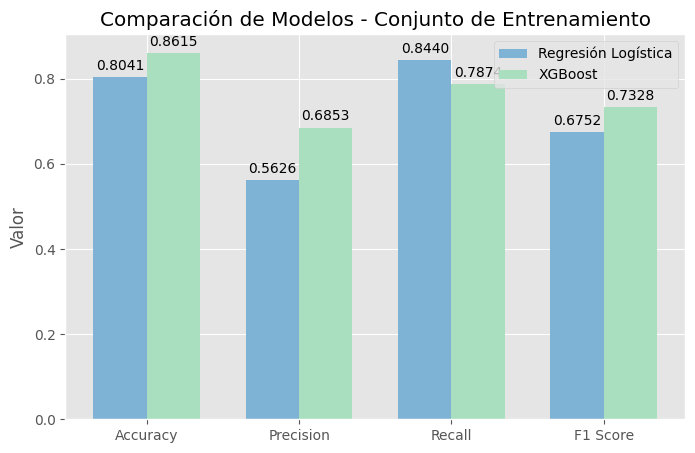

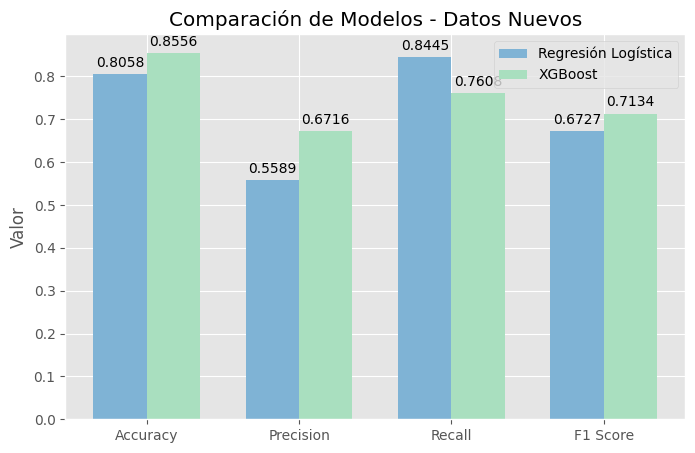

In [ ]:
# Métricas del conjunto de entrenamiento

metricas_entrenamiento = {
    "Accuracy": [reglog_accuracy, xgb_accuracy],
    "Precision": [reglog_precision, xgb_precision],
    "Recall": [reglog_recall, xgb_recall],
    "F1 Score": [reglog_f1, xgb_f1]
}

# Métricas del conjunto de datos nunca vistos

metricas_nuevo = {
    "Accuracy": [nuevo_reglog_accuracy, nuevo_xgb_accuracy],
    "Precision": [nuevo_reglog_precision, nuevo_xgb_precision],
    "Recall": [nuevo_reglog_recall, nuevo_xgb_recall],
    "F1 Score": [nuevo_reglog_f1, nuevo_xgb_f1]
}

nombre_modelos = ["Regresión Logística", "XGBoost"]
nombre_metricas = list(metricas_entrenamiento.keys())

x = np.arange(len(nombre_metricas))
width = 0.35

# Gráfico datos de entrenamiento

fig1, ax1 = plt.subplots(figsize=(8, 5))
bar1 = ax1.bar(x - width/2, [metricas_entrenamiento[m][0] for m in nombre_metricas], width, label=nombre_modelos[0], color="#7fb3d5")
bar2 = ax1.bar(x + width/2, [metricas_entrenamiento[m][1] for m in nombre_metricas], width, label=nombre_modelos[1], color="#a9dfbf")

ax1.set_ylabel("Valor")
ax1.set_title("Comparación de Modelos - Conjunto de Entrenamiento")
ax1.set_xticks(x)
ax1.set_xticklabels(nombre_metricas)
ax1.legend()
ax1.bar_label(bar1, fmt="%.4f", padding=3)
ax1.bar_label(bar2, fmt="%.4f", padding=3)

# Gráfico datos nunca vistos

fig2, ax2 = plt.subplots(figsize=(8, 5))
bar3 = ax2.bar(x - width/2, [metricas_nuevo[m][0] for m in nombre_metricas], width, label=nombre_modelos[0], color="#7fb3d5")
bar4 = ax2.bar(x + width/2, [metricas_nuevo[m][1] for m in nombre_metricas], width, label=nombre_modelos[1], color="#a9dfbf")

ax2.set_ylabel("Valor")
ax2.set_title("Comparación de Modelos - Datos Nuevos")
ax2.set_xticks(x)
ax2.set_xticklabels(nombre_metricas)
ax2.legend()
ax2.bar_label(bar3, fmt="%.4f", padding=3)
ax2.bar_label(bar4, fmt="%.4f", padding=3)

plt.show()

##**Conclusiones.**

Durante el desarrollo de este proyecto se entrenaron y evaluaron dos modelos de clasificación supervisada: **Regresión Logística** y **XGBoost**, con el objetivo de predecir correctamente si una persona percibe ingresos superiores a USD 50.000, a partir de un conjunto de variables demográficas y laborales.

Los resultados obtenidos nos permiten alcanzar algunas conclusiones interesantes:

* El modelo **XGBoost** presentó un mejor desempeño general, superando consistentemente al de Regresión Logística en las métricas accuracy, precisión, recall y F1 Score, tanto en el Dataset de entrenamiento como en el de datos nunca vistos. Este comportamiento sugiere una mayor capacidad del modelo para manejar relaciones complejas entre las variables sin comprometer su capacidad de generalización.

* El modelo **Regresión Logística** mostró un mejor recall, lo que indica que fue especialmente efectiva en detectar correctamente los casos positivos (quienes ganan por encima de USD 50.000). Sin embargo, esto se alcanza a costa de bajar la precisión, lo que se refleja en una tendencia a clasificar erróneamente algunos casos.


Cómo conclusión final podemos decir que si bien Regresión Logística por su simplicidad y rapidez de procesamiento, puede resultar válida para aquellos casos en que lo único importante es no dejar pasar casos positivos por alto; **XGBoost** ofrece un mejor equilibrio entre sensibilidad y precisión, posicionándose como la opción más eficiente para esta tarea predictiva.






